In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup as BS
import re

In [2]:
books_raw = pd.read_csv('../data/books_raw.csv')
books_raw.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [3]:
books_raw.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [4]:
books_raw.shape

(10000, 23)

In [5]:
the_list = pd.read_csv('../data/the_list.csv')
the_list.head()

,Unnamed: 0,Fiction work(s),Film adaptation(s),Author,Book_Title,Publication_Date,Book_Title_Cleaned,Film_Title,Release_Date
0,0,"The 25th Hour (2001), David Benioff",25th Hour (2002),David Benioff,The 25Th Hour,2001,The 25Th Hour,25Th Hour,2002
1,1,"3 Assassins (グラスホッパー, Gurasuhoppā) (2004), Kōt...",Grasshopper (2015),Kōtarō Isaka,"3 Assassins (グラスホッパー, Gurasuhoppā)",2004,3 Assassins,Grasshopper,2015
2,3,"4.50 from Paddington (1957), Agatha Christie",Crime Is Our Business (French: Le Crime est no...,Agatha Christie,4.50 From Paddington,1957,4.50 From Paddington,Crime Is Our Business (French: Le Crime Est No...,2008
3,5,"69 (シクスティナイン, Shikusutinain) (1987), Ryu Murakami",69 (2004),Ryu Murakami,"69 (シクスティナイン, Shikusutinain)",1987,69,69,2004
4,7,"À ton image (1998), Louise L. Lambrichs",À ton image (2004),Louise L. Lambrichs,À Ton Image,1998,À Ton Image,À Ton Image,2004


In [6]:
the_list.dtypes

Unnamed: 0             int64
Fiction work(s)       object
Film adaptation(s)    object
Author                object
Book_Title            object
Publication_Date       int64
Book_Title_Cleaned    object
Film_Title            object
Release_Date           int64
dtype: object

In [7]:
the_list.Book_Title_Cleaned.nunique()

449

In [8]:
the_list.Book_Title_Cleaned.unique()

array(['The 25Th Hour', '3 Assassins', '4.50 From Paddington', '69',
       'À Ton Image', 'About A Boy', 'About Schmidt', 'Adam Resurrected',
       'Adams Fall', 'Adiliya By The River', 'Adolphe',
       'The Adventures Of Captain Alatriste',
       'The Adventures Of Pinocchio', 'The Adventures Of Tom Sawyer',
       'After', 'Airborn', "All The King'S Men",
       'All Quiet On The Western Front', 'All She Was Worth',
       'All The Way', 'All You Need Is Kill', "Almayer'S Folly",
       'Along Came A Spider', 'The Alzheimer Case', 'American Knees',
       'American Psycho', 'American Splendor', 'The Amityville Horror',
       'Amu', 'An Ancient Tale: A Novel In Polish History',
       'And Then There Were None', 'Angel', 'Angels & Demons',
       'Anime Supremacy!', 'Anne Of Green Gables', 'Annihilation',
       'Another', 'Antikiller', 'Around The World In Eighty Days',
       'Ask The Dust', 'Asking For Trouble',
       'The Assassination Of Jesse James By The Coward Robert For

In [9]:
books_raw[books_raw.original_title.isin(the_list.Book_Title_Cleaned.unique())]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
12,13,5470,5470,153313,995,451524934,9.780452e+12,"George Orwell, Erich Fromm, Celâl Üster",1949.0,Nineteen Eighty-Four,...,1956832,2053394,45518,41845,86425,324874,692021,908229,https://images.gr-assets.com/books/1348990566m...,https://images.gr-assets.com/books/1348990566s...
21,22,12232938,12232938,1145090,183,316166685,9.780316e+12,Alice Sebold,2002.0,The Lovely Bones,...,1605173,1661562,36642,62777,131188,404699,583575,479323,https://images.gr-assets.com/books/1457810586m...,https://images.gr-assets.com/books/1457810586s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,7649,298663,298663,1724756,62,679733973,9.780680e+12,Jim Thompson,1952.0,The Killer Inside Me,...,12425,13993,1046,269,834,3139,5584,4167,https://images.gr-assets.com/books/1403187402m...,https://images.gr-assets.com/books/1403187402s...
8353,8354,252938,252938,245106,41,60827645,9.780061e+12,Erin Hunter,2006.0,Twilight,...,15604,16704,361,138,473,2514,4665,8914,https://images.gr-assets.com/books/1363786463m...,https://images.gr-assets.com/books/1363786463s...
8438,8439,31178,31178,2731250,44,345477243,9.780345e+12,Anne Tyler,2001.0,Back When We Were Grownups,...,13416,14632,1237,315,1422,5501,5341,2053,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8790,8791,893731,893731,1807862,42,425178102,9.780425e+12,Dave Barry,1999.0,Big Trouble,...,10954,11621,646,208,818,3116,4292,3187,https://images.gr-assets.com/books/1429999879m...,https://images.gr-assets.com/books/1429999879s...


In [10]:
pattern = '|'.join(the_list.Book_Title_Cleaned.unique())
books_raw[books_raw.original_title.str.contains(pattern, case=False, na=False)]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
6,7,5907,5907,1540236,969,618260307,9.780618e+12,J.R.R. Tolkien,1937.0,The Hobbit or There and Back Again,...,2071616,2196809,37653,46023,76784,288649,665635,1119718,https://images.gr-assets.com/books/1372847500m...,https://images.gr-assets.com/books/1372847500s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,9961,6872,6872,1084689,73,679749845,9.780680e+12,Ian McEwan,1981.0,The Comfort of Strangers,...,8843,10431,902,423,1232,3623,3627,1526,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9968,9969,23013953,23013953,40087473,67,1771641495,9.781772e+12,"Giulia Enders, Jill Enders",2014.0,Darm mit Charme,...,5973,12156,1394,92,452,2588,5329,3695,https://images.gr-assets.com/books/1435168687m...,https://images.gr-assets.com/books/1435168687s...
9992,9993,4936457,4936457,5002120,27,224079948,9.780224e+12,Ian Mortimer,2008.0,The Time-Traveller's Guide to Medieval England...,...,9824,12115,970,236,521,2497,4790,4071,https://images.gr-assets.com/books/1328167619m...,https://images.gr-assets.com/books/1328167619s...
9993,9994,4769651,4769651,4834466,2,810983559,9.780811e+12,"Michael Buckley, Peter Ferguson",2009.0,"The Everafter War (The Sisters Grimm, #7)",...,12493,12965,455,110,289,1745,3989,6832,https://images.gr-assets.com/books/1388278230m...,https://images.gr-assets.com/books/1388278230s...


In [11]:
books_raw[books_raw.authors.isin(the_list.Author.unique())]

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
8,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000.0,Angels & Demons,...,2001311,2078754,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...
9,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813.0,Pride and Prejudice,...,2035490,2191465,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9792,9793,15677,15677,1187279,77,393321983,9.780393e+12,Patricia Highsmith,1950.0,Strangers on a Train,...,9788,11500,1055,195,720,2843,4922,2820,https://images.gr-assets.com/books/1331234879m...,https://images.gr-assets.com/books/1331234879s...
9922,9923,228200,228200,9813455,26,451190564,9.780451e+12,Stephen King,1996.0,"The Green Mile, Part 5: Night Journey",...,11442,11918,111,26,122,1015,3282,7473,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9927,9928,33896,33896,2414732,46,375509321,9.780376e+12,Charles Frazier,2006.0,Thirteen Moons,...,9028,10124,1539,298,976,2956,3700,2194,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9976,9977,202948,202948,851165,55,804113475,9.780804e+12,Anne Tyler,1995.0,Ladder of Years,...,11209,12229,949,214,854,3714,4827,2620,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...


In [12]:
merge_filter = the_list[['Author', 'Publication_Date']].drop_duplicates()

In [13]:
books_raw = books_raw.dropna(subset=['original_publication_year', 'authors'])

In [14]:
books_raw.original_publication_year = books_raw.original_publication_year.astype(int)

In [15]:
book_list = pd.merge(books_raw, merge_filter, 
                               left_on = ['authors', 'original_publication_year'], right_on = ['Author', 'Publication_Date'], 
                               how = 'inner')
book_list

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,Author,Publication_Date
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008,The Hunger Games,...,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,2008
1,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005,Twilight,...,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Stephenie Meyer,2005
2,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925,The Great Gatsby,...,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,F. Scott Fitzgerald,1925
3,9,960,960,3338963,311,1416524797,9.781417e+12,Dan Brown,2000,Angels & Demons,...,25112,77841,145740,458429,716569,680175,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...,Dan Brown,2000
4,10,1885,1885,3060926,3455,679783261,9.780680e+12,Jane Austen,1813,Pride and Prejudice,...,49152,54700,86485,284852,609755,1155673,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...,Jane Austen,1813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,8939,1331653,1331653,1601627,60,753821788,9.780754e+12,Paul Torday,2006,Salmon Fishing in the Yemen,...,1345,285,1086,3823,4102,1523,https://images.gr-assets.com/books/1347617111m...,https://images.gr-assets.com/books/1347617111s...,Paul Torday,2006
151,8976,39664,39664,24951203,37,896214400,9.780896e+12,Stephen King,1982,The Shawshank Redemption,...,788,16,115,1003,3776,7972,https://images.gr-assets.com/books/1315100686m...,https://images.gr-assets.com/books/1315100686s...,Stephen King,1982
152,9079,450836,19860524,2885501,6,1573458716,9.781573e+12,Gerald N. Lund,1991,"The Work and the Glory, Vol. 2: Like a Fire Bu...",...,251,37,235,1582,4051,5112,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Gerald N. Lund,1991
153,9139,5417,5417,14960,4,517219026,9.780517e+12,Stephen King,1983,Three Complete Novels: Carrie/Salem's Lot/The ...,...,66,82,134,970,2715,7281,https://images.gr-assets.com/books/1376725117m...,https://images.gr-assets.com/books/1376725117s...,Stephen King,1983


In [16]:
book_list = book_list.drop(columns=['book_id', 'work_id', 'books_count', 'isbn', 'language_code', 'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'work_ratings_count', 'work_text_reviews_count'])
book_list.head(1)

,goodreads_book_id,best_book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url,Author,Publication_Date
0,2767052,2767052,9.780439e+12,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,2008


In [17]:
book_list = book_list.dropna(subset=['original_publication_year', 'authors', 'original_title', 'average_rating'])
book_list.shape

(149, 13)

In [18]:
book_list[book_list.duplicated(subset=['Author', 'Publication_Date'], keep=False)].sort_values('Publication_Date')

,goodreads_book_id,best_book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url,Author,Publication_Date
48,1852,1852,9.780439e+12,Jack London,1903,The Call of the Wild,The Call of the Wild,3.83,223932,https://images.gr-assets.com/books/1452291694m...,https://images.gr-assets.com/books/1452291694s...,Jack London,1903
147,194808,194808,9.780969e+12,Jack London,1903,To Build a Fire,To Build a Fire,3.92,12133,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Jack London,1903
90,37677,37677,9.781587e+12,Jack London,1906,The Call of the Wild / White Fang,The Call of the Wild/White Fang,4.08,61126,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Jack London,1906
74,43035,43035,9.780439e+12,Jack London,1906,White Fang,White Fang,3.94,100223,https://images.gr-assets.com/books/1475878443m...,https://images.gr-assets.com/books/1475878443s...,Jack London,1906
131,43037,43037,9.780193e+12,Jack London,1906,"The Call of the Wild, White Fang and Other Sto...","The Call of the Wild, White Fang and Other Sto...",3.97,16717,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Jack London,1906
96,14064,14064,9.781858e+12,Richard Matheson,1954,I Am Legend,I Am Legend,4.07,46845,https://images.gr-assets.com/books/1390170456m...,https://images.gr-assets.com/books/1390170456s...,Richard Matheson,1954
73,547094,547094,9.780313e+12,Richard Matheson,1954,I Am Legend and Other Stories,I Am Legend and Other Stories,3.99,98795,https://images.gr-assets.com/books/1317791583m...,https://images.gr-assets.com/books/1317791583s...,Richard Matheson,1954
62,233667,233667,9.780451e+12,Stephen King,1980,Firestarter,Firestarter,3.85,142213,https://images.gr-assets.com/books/1394208032m...,https://images.gr-assets.com/books/1394208032s...,Stephen King,1980
81,813214,813214,9.780451e+12,Stephen King,1980,The Mist,The Mist,3.92,82062,https://images.gr-assets.com/books/1331317781m...,https://images.gr-assets.com/books/1331317781s...,Stephen King,1980
65,39662,39662,9.780752e+12,Stephen King,1982,Different Seasons,Different Seasons,4.34,105961,https://images.gr-assets.com/books/1329662611m...,https://images.gr-assets.com/books/1329662611s...,Stephen King,1982


In [19]:
book_list = book_list.drop([90, 131, 73, 153], axis='index')
book_list.shape

(145, 13)

In [20]:
book_list[book_list.duplicated(subset=['Author', 'Publication_Date'], keep=False)].sort_values('Publication_Date')

,goodreads_book_id,best_book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url,Author,Publication_Date
48,1852,1852,9.780439e+12,Jack London,1903,The Call of the Wild,The Call of the Wild,3.83,223932,https://images.gr-assets.com/books/1452291694m...,https://images.gr-assets.com/books/1452291694s...,Jack London,1903
147,194808,194808,9.780969e+12,Jack London,1903,To Build a Fire,To Build a Fire,3.92,12133,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Jack London,1903
81,813214,813214,9.780451e+12,Stephen King,1980,The Mist,The Mist,3.92,82062,https://images.gr-assets.com/books/1331317781m...,https://images.gr-assets.com/books/1331317781s...,Stephen King,1980
62,233667,233667,9.780451e+12,Stephen King,1980,Firestarter,Firestarter,3.85,142213,https://images.gr-assets.com/books/1394208032m...,https://images.gr-assets.com/books/1394208032s...,Stephen King,1980
65,39662,39662,9.780752e+12,Stephen King,1982,Different Seasons,Different Seasons,4.34,105961,https://images.gr-assets.com/books/1329662611m...,https://images.gr-assets.com/books/1329662611s...,Stephen King,1982
37,43615,43615,9.780452e+12,Stephen King,1982,The Gunslinger,"The Gunslinger (The Dark Tower, #1)",3.99,332494,https://images.gr-assets.com/books/1375776480m...,https://images.gr-assets.com/books/1375776480s...,Stephen King,1982
151,39664,39664,9.780896e+12,Stephen King,1982,The Shawshank Redemption,Rita Hayworth and Shawshank Redemption: A Stor...,4.52,11499,https://images.gr-assets.com/books/1315100686m...,https://images.gr-assets.com/books/1315100686s...,Stephen King,1982
54,38980,38980,9.780613e+12,Meg Cabot,2000,The Princess Diaries,"The Princess Diaries (The Princess Diaries, #1)",3.76,193140,https://images.gr-assets.com/books/1355011082m...,https://images.gr-assets.com/books/1355011082s...,Meg Cabot,2000
105,187811,187811,9.780061e+12,Meg Cabot,2000,Shadowland,"Shadowland (The Mediator, #1)",4.04,51580,https://images.gr-assets.com/books/1327886166m...,https://images.gr-assets.com/books/1327886166s...,Meg Cabot,2000
104,5357,5357,9.780099e+12,John Grisham,2001,Skipping Christmas,Skipping Christmas,3.47,39486,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,John Grisham,2001


In [21]:
book_list[book_list.duplicated(subset=['goodreads_book_id'], keep=False)].sort_values('Publication_Date')

,goodreads_book_id,best_book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url,Author,Publication_Date


In [22]:
join_filter = the_list[['Author', 'Publication_Date', 'Book_Title_Cleaned']].drop_duplicates()

In [23]:
book_list = pd.merge(book_list, join_filter, 
                               on = ['Author', 'Publication_Date'], 
                               how = 'left')
book_list

,goodreads_book_id,best_book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url,Author,Publication_Date,Book_Title_Cleaned
0,2767052,2767052,9.780439e+12,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,2008,The Hunger Games
1,41865,41865,9.780316e+12,Stephenie Meyer,2005,Twilight,"Twilight (Twilight, #1)",3.57,3866839,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,Stephenie Meyer,2005,Twilight
2,4671,4671,9.780743e+12,F. Scott Fitzgerald,1925,The Great Gatsby,The Great Gatsby,3.89,2683664,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,F. Scott Fitzgerald,1925,The Great Gatsby
3,960,960,9.781417e+12,Dan Brown,2000,Angels & Demons,"Angels & Demons (Robert Langdon, #1)",3.85,2001311,https://images.gr-assets.com/books/1303390735m...,https://images.gr-assets.com/books/1303390735s...,Dan Brown,2000,Angels & Demons
4,1885,1885,9.780680e+12,Jane Austen,1813,Pride and Prejudice,Pride and Prejudice,4.24,2035490,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...,Jane Austen,1813,Pride And Prejudice
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,481462,481462,9.780449e+12,Gary Brandner,1977,The Howling,The Howling,3.92,10414,https://images.gr-assets.com/books/1285664467m...,https://images.gr-assets.com/books/1285664467s...,Gary Brandner,1977,The Howling
143,1331653,1331653,9.780754e+12,Paul Torday,2006,Salmon Fishing in the Yemen,Salmon Fishing in the Yemen,3.51,9299,https://images.gr-assets.com/books/1347617111m...,https://images.gr-assets.com/books/1347617111s...,Paul Torday,2006,Salmon Fishing In The Yemen
144,39664,39664,9.780896e+12,Stephen King,1982,The Shawshank Redemption,Rita Hayworth and Shawshank Redemption: A Stor...,4.52,11499,https://images.gr-assets.com/books/1315100686m...,https://images.gr-assets.com/books/1315100686s...,Stephen King,1982,The Running Man
145,450836,19860524,9.781573e+12,Gerald N. Lund,1991,"The Work and the Glory, Vol. 2: Like a Fire Bu...","Like a Fire Burning (The Work and the Glory, #2)",4.27,9944,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Gerald N. Lund,1991,Like A Fire Is Burning


In [24]:
book_list[book_list.duplicated(subset=['goodreads_book_id'], keep=False)].sort_values('Publication_Date')

,goodreads_book_id,best_book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url,Author,Publication_Date,Book_Title_Cleaned
82,5360,5360,9.780385e+12,John Grisham,2001,A Painted House,A Painted House,3.67,59974,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,John Grisham,2001,A Painted House
83,5360,5360,9.780385e+12,John Grisham,2001,A Painted House,A Painted House,3.67,59974,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,John Grisham,2001,Skipping Christmas
100,5357,5357,9.780099e+12,John Grisham,2001,Skipping Christmas,Skipping Christmas,3.47,39486,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,John Grisham,2001,A Painted House
101,5357,5357,9.780099e+12,John Grisham,2001,Skipping Christmas,Skipping Christmas,3.47,39486,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,John Grisham,2001,Skipping Christmas


In [25]:
book_list = book_list.drop([100, 83], axis='index')
book_list.shape

(145, 14)

In [26]:
book_list[book_list.duplicated(subset=['goodreads_book_id'], keep=False)].sort_values('Publication_Date')

,goodreads_book_id,best_book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url,Author,Publication_Date,Book_Title_Cleaned


In [27]:
book_list[['original_title', 'Book_Title_Cleaned']]

,original_title,Book_Title_Cleaned
0,The Hunger Games,The Hunger Games
1,Twilight,Twilight
2,The Great Gatsby,The Great Gatsby
3,Angels & Demons,Angels & Demons
4,Pride and Prejudice,Pride And Prejudice
...,...,...
142,The Howling,The Howling
143,Salmon Fishing in the Yemen,Salmon Fishing In The Yemen
144,The Shawshank Redemption,The Running Man
145,"The Work and the Glory, Vol. 2: Like a Fire Bu...",Like A Fire Is Burning


In [30]:
book_list[book_list.original_title != book_list.Book_Title_Cleaned][['original_title', 'Book_Title_Cleaned']]

,original_title,Book_Title_Cleaned
3,Angels & Demons,Angels & Demons
4,Pride and Prejudice,Pride And Prejudice
8,"The Lion, the Witch and the Wardrobe",The Chronicles Of Narnia
9,The Time Traveler's Wife,The Time Traveler'S Wife
10,The Lightning Thief,Percy Jackson & The Olympians
...,...,...
140,To Build a Fire,The Call Of The Wild
143,Salmon Fishing in the Yemen,Salmon Fishing In The Yemen
144,The Shawshank Redemption,The Running Man
145,"The Work and the Glory, Vol. 2: Like a Fire Bu...",Like A Fire Is Burning


In [31]:
book_list = book_list.drop([144, 140], axis='index')
book_list.shape

(143, 14)

In [34]:
book_list[book_list.original_title != book_list.Book_Title_Cleaned][['original_title', 'Book_Title_Cleaned']].head(60)

,original_title,Book_Title_Cleaned
3,Angels & Demons,Angels & Demons
4,Pride and Prejudice,Pride And Prejudice
8,"The Lion, the Witch and the Wardrobe",The Chronicles Of Narnia
9,The Time Traveler's Wife,The Time Traveler'S Wife
10,The Lightning Thief,Percy Jackson & The Olympians
12,Life of Pi,Life Of Pi
13,Water for Elephants,Water For Elephants
15,City of Bones,The Mortal Instruments – Book One: City Of Bones
16,The Hitchhiker's Guide to the Galaxy,The Hitchhiker'S Guide To The Galaxy
17,Breaking Dawn,The Host


In [35]:
book_list[book_list.original_title != book_list.Book_Title_Cleaned][['original_title', 'Book_Title_Cleaned']].tail(20)

,original_title,Book_Title_Cleaned
111,Tarzan of the Apes,Tarzan
112,The Closers,The Lincoln Lawyer
113,Ben-Hur: A Tale of the Christ,Ben-Hur: A Tale Of The Christ
115,Twilight,Avalon High
117,Blood and Chocolate,Blood And Chocolate
120,To Your Scattered Bodies Go,Riverworld
122,The Bridge of San Luis Rey,The Bridge Of San Luis Rey
124,Winter's Bone,Winter'S Bone
125,The Sea Wolf,The Sea-Wolf
130,The Mirror Crack'd from Side to Side,The Mirror Crack'D From Side To Side


In [36]:
book_list = book_list.drop([17, 29, 33, 35, 59, 61, 63, 67, 68, 73, 76, 78, 87, 88, 94, 97, 102, 110, 112, 115, 120, 132, 138], axis='index')
book_list.shape

(120, 14)

In [37]:
book_list[book_list.original_title != book_list.Book_Title_Cleaned][['original_title', 'Book_Title_Cleaned']]

,original_title,Book_Title_Cleaned
3,Angels & Demons,Angels & Demons
4,Pride and Prejudice,Pride And Prejudice
8,"The Lion, the Witch and the Wardrobe",The Chronicles Of Narnia
9,The Time Traveler's Wife,The Time Traveler'S Wife
10,The Lightning Thief,Percy Jackson & The Olympians
12,Life of Pi,Life Of Pi
13,Water for Elephants,Water For Elephants
15,City of Bones,The Mortal Instruments – Book One: City Of Bones
16,The Hitchhiker's Guide to the Galaxy,The Hitchhiker'S Guide To The Galaxy
22,A Walk to Remember,A Walk To Remember


In [38]:
book_list.shape

(120, 14)

In [40]:
the_list.columns

Index(['Unnamed: 0', 'Fiction work(s)', 'Film adaptation(s)', 'Author',
       'Book_Title', 'Publication_Date', 'Book_Title_Cleaned', 'Film_Title',
       'Release_Date'],
      dtype='object')

In [42]:
join_list = the_list[['Author', 'Book_Title', 'Publication_Date', 'Book_Title_Cleaned', 'Film_Title', 'Release_Date']]

In [43]:
the_book_list = pd.merge(book_list, join_list, 
                               on = ['Author', 'Publication_Date', 'Book_Title_Cleaned'], 
                               how = 'left')
the_book_list.shape

(166, 17)

In [45]:
the_book_list[the_book_list.duplicated(subset=['Author', 'Publication_Date', 'Book_Title_Cleaned'], keep=False)].sort_values('Publication_Date')

,goodreads_book_id,best_book_id,isbn13,authors,original_publication_year,original_title,title,average_rating,ratings_count,image_url,small_image_url,Author,Publication_Date,Book_Title_Cleaned,Book_Title,Film_Title,Release_Date
16,1885,1885,9.780680e+12,Jane Austen,1813,Pride and Prejudice,Pride and Prejudice,4.24,2035490,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...,Jane Austen,1813,Pride And Prejudice,Pride And Prejudice,Bride And Prejudice,2004
15,1885,1885,9.780680e+12,Jane Austen,1813,Pride and Prejudice,Pride and Prejudice,4.24,2035490,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...,Jane Austen,1813,Pride And Prejudice,Pride And Prejudice,Pride & Prejudice: A Latter-Day Comedy,2003
17,1885,1885,9.780680e+12,Jane Austen,1813,Pride and Prejudice,Pride and Prejudice,4.24,2035490,https://images.gr-assets.com/books/1320399351m...,https://images.gr-assets.com/books/1320399351s...,Jane Austen,1813,Pride And Prejudice,Pride And Prejudice,Pride & Prejudice,2005
127,24580,24580,9.780452e+12,Mark Twain,1876,Tom Sawyer & Huckleberry Finn,The Adventures of Tom Sawyer & Adventures of H...,4.07,30228,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Mark Twain,1876,The Adventures Of Tom Sawyer,The Adventures Of Tom Sawyer,Band Of Robbers,2015
126,24580,24580,9.780452e+12,Mark Twain,1876,Tom Sawyer & Huckleberry Finn,The Adventures of Tom Sawyer & Adventures of H...,4.07,30228,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...,Mark Twain,1876,The Adventures Of Tom Sawyer,The Adventures Of Tom Sawyer,Tom Sawyer & Huckleberry Finn,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2767052,2767052,9.780439e+12,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,2008,The Hunger Games,The Hunger Games,The Hunger Games: The Ballad Of Songbirds & Sn...,2023
0,2767052,2767052,9.780439e+12,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,2008,The Hunger Games,The Hunger Games,The Hunger Games,2012
1,2767052,2767052,9.780439e+12,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,2008,The Hunger Games,The Hunger Games,The Hunger Games: Catching Fire,2013
3,2767052,2767052,9.780439e+12,Suzanne Collins,2008,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",4.34,4780653,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,Suzanne Collins,2008,The Hunger Games,The Hunger Games,The Hunger Games: Mockingjay - Part 2,2015


In [46]:
the_book_list.to_csv('../data/the_book_list.csv')

In [47]:
books_raw.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [48]:
books_raw[['goodreads_book_id', 'authors', 'original_publication_year', 'original_title', 'average_rating']]

,goodreads_book_id,authors,original_publication_year,original_title,average_rating
0,2767052,Suzanne Collins,2008,The Hunger Games,4.34
1,3,"J.K. Rowling, Mary GrandPré",1997,Harry Potter and the Philosopher's Stone,4.44
2,41865,Stephenie Meyer,2005,Twilight,3.57
3,2657,Harper Lee,1960,To Kill a Mockingbird,4.25
4,4671,F. Scott Fitzgerald,1925,The Great Gatsby,3.89
...,...,...,...,...,...
9995,7130616,Ilona Andrews,2010,Bayou Moon,4.09
9996,208324,Robert A. Caro,1990,Means of Ascent,4.25
9997,77431,Patrick O'Brian,1977,The Mauritius Command,4.35
9998,8565083,Peggy Orenstein,2011,Cinderella Ate My Daughter: Dispatches from th...,3.65


In [49]:
avg_books = books_raw[['goodreads_book_id', 'authors', 'original_publication_year', 'original_title', 'average_rating']]

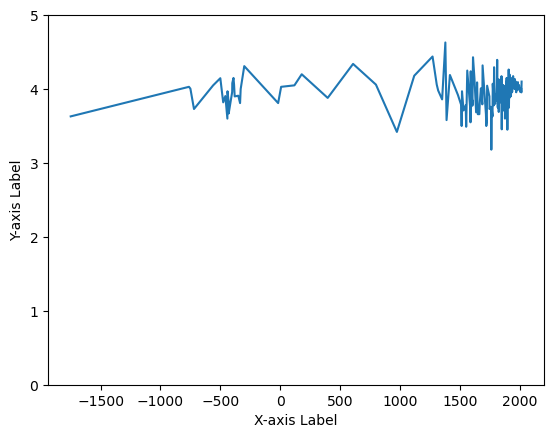

In [50]:
ax = avg_books.groupby('original_publication_year').average_rating.mean().plot(kind='line')

ax.set_ylim(0, 5)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()

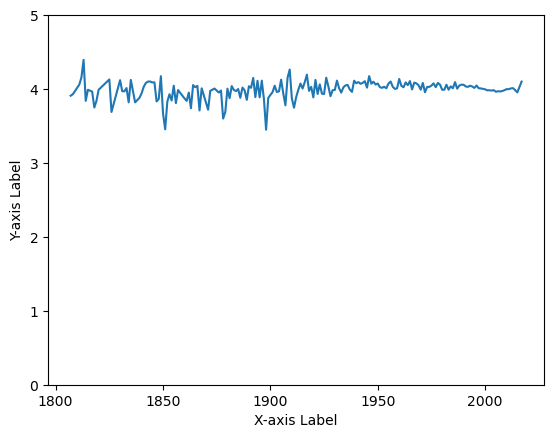

In [53]:
ax = avg_books[avg_books.original_publication_year > 1800].groupby('original_publication_year').average_rating.mean().plot(kind='line')

ax.set_ylim(0, 5)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.show()